## analisi risultati tufo

In [23]:
import numpy as np
import math
import sys
import random
import matplotlib.pyplot as plt

In [24]:
import pandas
df = pandas.read_csv('misure_tufo.csv')

In [25]:
conteggi_c=df.iloc[0]
conteggi_tot=df.iloc[1]
conteggi_tot=np.array(conteggi_tot)
conteggi_c=np.array(conteggi_c)
T=599

In [28]:
from scipy.stats import gamma
def inferenza_R599(conteggi,n_mis,off,T,xlim1,xlim2):
    x=sum(conteggi)
    R = np.linspace(xlim1, xlim2, 300)
    plt.plot(R, gamma.pdf(R*T, a=x+1, scale=1/n_mis)*T,
             label='f(R|$~\sum x_i$={0:.1f},T)'.format(x))
    plt.title('Funzione verosimiglianza rate t={0:.1f}s '.format(T), fontsize=16)
    plt.xlabel('R',fontsize=16)
    plt.ylim(0, 1.5*max(gamma.pdf(R*T, a=x+1, scale=1/n_mis)*T))
    plt.ylabel('f(R)',fontsize=16)
    plt.legend(loc='upper right',fontsize=16)
    mean, var = gamma.stats(a=x+1, scale=1/n_mis, moments='mv')
    mean=mean/T
    sd = np.sqrt(var)/T
    plt.hlines(off, mean-sd, mean+sd,
               colors='black', lw=2,
               label='sigma[R]={0:.3f}'.format(sd))
    plt.plot(mean, off, 'ro', ms=4,
             label='E[R]={0:.3f}'.format(mean))
    plt.legend(loc='upper right',fontsize=11)
    return mean,sd

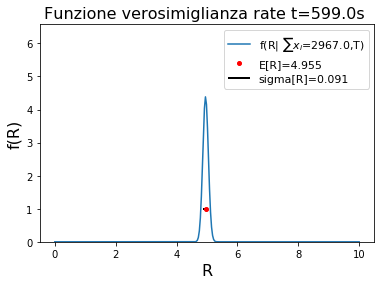

In [31]:
Rc,sigma_Rc=inferenza_R599(conteggi_c,1,1,T,0,10)

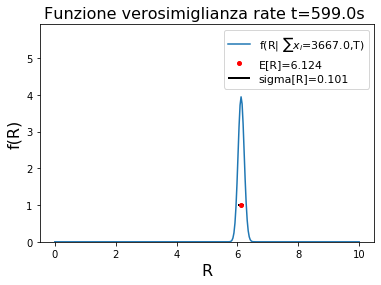

In [32]:
Rtot,sigma_Rtot=inferenza_R599(conteggi_tot,1,1,T,0,10)

### Rt=Rtot - Rc

In [37]:
print(Rtot,sigma_Rtot)

6.123539232053423 0.10110854043223186


In [38]:
print(Rc,sigma_Rc)

4.954924874791319 0.0909505073247161


In [40]:
Rt=Rtot-Rc
sigma_Rt=sigma_Rtot+sigma_Rc
print(Rt,sigma_Rt)

1.1686143572621042 0.19205904775694796
